# Session 3: 8 March 2018

## Probability distributions (recap), the Normal (Gaussian) Distribution

# Binomial

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sp 

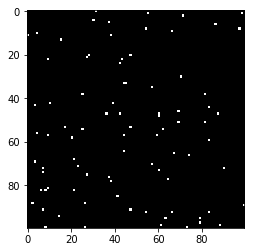

In [94]:
N = 100
p = 0.01
s = np.random.binomial(1,p, N*N)
out = np.reshape(a=s,newshape=(N,N))
plt.imshow(out, cmap='gray')
plt.show()

In [104]:
n = 20
window_count =  np.ones((n,n))
window_mean = np.ones((n,n))/(n*n)
outcount = sp.convolve2d(out,window_count, mode='valid')
outmean = sp.convolve2d(out,window_mean, mode='valid')
plt.imshow(outcount, cmap='gray')
plt.show()
plt.hist(outcount.flatten(), bins=range(0,2n))
plt.show()

SyntaxError: invalid syntax (<ipython-input-104-f857c586a29f>, line 8)

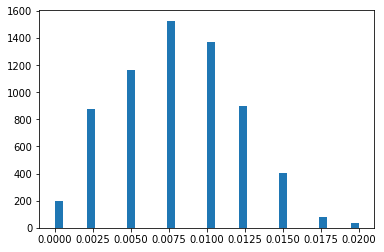

In [101]:
# print(outcount)
# print(outmean)

plt.hist(outmean.flatten(), bins='auto')
plt.show()